# State Distribution Example

In this example, we plan to plot the distribution of system states. This helps researchers on serverless computing platforms to debug and test out their performance models with knowledge of system state distribution.

In [1]:
# imports

%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from pacssim.ServerlessSimulator import ServerlessSimulator as Sim

sim = Sim(arrival_rate=0.9, warm_service_rate=1/2.016, cold_service_rate=1/2.163,
            expiration_threshold=600, max_time=100000)
sim.generate_trace(debug_print=False)
sim.print_trace_results()

Cold Starts / total requests: 	 121 / 90289
Cold Start Probability: 	 0.0013
Rejection / total requests: 	 0 / 90289
Rejection Probability: 		 0.0000
Average Instance Life Span: 	 6535.5328
Average Server Count:  		 7.6639
Average Running Count:  	 1.8277
Average Idle Count:  		 5.8361


You can define any state representation you want based on the data present in the trace.
Here, we chose to use the number of servers as state.

In [22]:
sim.calculate_time_lengths()

# encode states
hist_states = []
for idx in range(len(sim.hist_server_count)):
    if sim.hist_server_count[idx] == 0:
        hist_states.append((0, 'd'))
    else:
        curr_server_count = sim.hist_server_count[idx]
        prev_server_count = sim.hist_server_count[idx-1]
        if curr_server_count > prev_server_count:
            hist_states.append((curr_server_count, 'u'))
        elif curr_server_count < prev_server_count:
            hist_states.append((curr_server_count, 'd'))
        else: # state hasn't changed
            hist_states.append(hist_states[-1])

vals, probs = sim.calculate_time_average(hist_states, skip_init_time=100)
# sim.print_time_average(vals, probs)
residence_time_avgs = sim.get_average_residence_times(hist_states, skip_init_time=100)
residence_time_list = [residence_time_avgs[s] for s in vals]
pd.DataFrame(data = {'state': vals, 'prob': probs, 'residence': residence_time_list})

,state,prob,residence
0,"(6, u)",0.001683,168.104637
1,"(6, d)",0.040393,168.134269
2,"(9, u)",0.090818,432.033824
3,"(7, d)",0.295378,480.766492
4,"(8, d)",0.037991,180.726130
5,"(8, u)",0.355846,573.369123
6,"(9, d)",0.003134,44.722321
7,"(10, u)",0.042115,601.039282
8,"(7, u)",0.132643,530.039994


Calculate average sojourn time, just check how long it takes for you to transition into another state.

## Calculate Time Average of Server Count

Value           Prob
6               0.0462
7               0.4212
8               0.3497
9               0.1147
10              0.0561
11              0.0120


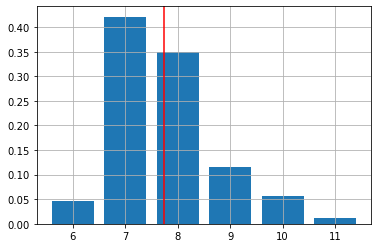

In [4]:
sim.calculate_time_lengths()

unq_vals, val_times = sim.calculate_time_average(sim.hist_server_count, skip_init_time=100)

plt.bar(unq_vals, val_times)
plt.grid(True)
plt.axvline(x=sim.get_average_server_count(), c='r')

sim.print_time_average(unq_vals, val_times)

In [5]:
pd.DataFrame(data = {
    'server_count': unq_vals,
    'Probability': val_times
})

,server_count,Probability
0,6,0.046229
1,7,0.421217
2,8,0.349719
3,9,0.114708
4,10,0.056106
5,11,0.012021
